## Iniciando bibliotecas

In [630]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, f1_score



## Definindo o database, realizando limpeza de dados e definindo classes

In [631]:
df = pd.read_excel('db.xlsx')

In [632]:
df = df.drop_duplicates()
df = df.dropna()

In [633]:
df['Glucose-type'] = 0
df.loc[(df['Blood Glucose Level(BGL)'] > 80), 'Glucose-type'] = 1


In [634]:
df.loc[df['Diabetic/NonDiabetic (D/N)'] == 'N', 'Diabetic/NonDiabetic (D/N)'] = 1
df.loc[df['Diabetic/NonDiabetic (D/N)'] == 'D', 'Diabetic/NonDiabetic (D/N)'] = 0

In [635]:
df

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Diabetic/NonDiabetic (D/N),Glucose-type
0,9,79,73,118,98,98.300707,99,0,0,1,0
1,9,80,73,119,102,98.300707,94,1,0,1,0
2,9,70,76,110,81,98.300707,98,1,0,1,0
3,9,70,78,115,96,98.300707,96,1,0,1,0
4,66,100,96,144,92,97.807052,98,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
16964,9,86,87,127,90,96.842657,97,0,0,0,1
16965,9,84,79,117,80,97.869454,98,0,0,0,1
16966,9,81,82,116,93,96.766282,98,0,0,0,1
16967,9,82,86,128,91,98.941036,98,0,0,0,1


In [636]:
df.groupby('Glucose-type').size()

Glucose-type
0    7486
1    9214
dtype: int64

In [637]:
X = df.drop(['Glucose-type', 'Blood Glucose Level(BGL)', 'Diabetic/NonDiabetic (D/N)'], axis=1) 
y = df['Glucose-type'] 
##sys 

## 

In [638]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [639]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [640]:
n_features = X_train.shape[1] 

n_classes = len(y.unique())

In [641]:
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train.to_numpy()
)
class_weights_dict = dict(enumerate(class_weights))
print(f"Pesos de Classe aplicados: {class_weights_dict}")


Pesos de Classe aplicados: {0: 1.1153781933544833, 1: 0.9062542395875729}


In [642]:
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)

In [643]:
mlp_keras = Sequential([
    Dense(64, activation='relu', input_shape=(n_features,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [644]:
optimizer = Adam(learning_rate=0.001)
mlp_keras.compile(
    optimizer= optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)
mlp_keras.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)               │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 128 (512.00 B)

In [645]:
print("\n--- Treinando ---")
history = mlp_keras.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=64,
    verbose=1,
    class_weight=class_weights_dict,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
    
)
print("Treinamento concluído!")


--- Treinando ---
Epoch 1/500
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7551 - loss: 0.5024 - val_accuracy: 0.8231 - val_loss: 0.4355
Epoch 2/500
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8103 - loss: 0.4404 - val_accuracy: 0.8302 - val_loss: 0.4080
Epoch 3/500
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8201 - loss: 0.4271 - val_accuracy: 0.8320 - val_loss: 0.4023
Epoch 4/500
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8194 - loss: 0.4245 - val_accuracy: 0.8326 - val_loss: 0.4008
Epoch 5/500
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8229 - loss: 0.4214 - val_accuracy: 0.8338 - val_loss: 0.4013
Epoch 6/500
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8238 - loss: 0.4168 - val_accuracy: 0.8335 - val_loss: 0.4031
Epoch 7/500
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8243 - loss: 0.4176 - val_accuracy: 0.8335 - val_loss: 0.3981
Epoch 8/500
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8246 - loss

In [646]:
print("\n--- Avaliando o modelo no conjunto de teste ---")
test_loss, test_accuracy = mlp_keras.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")
print(f"Loss no conjunto de teste: {test_loss:.4f}")


--- Avaliando o modelo no conjunto de teste ---
Acurácia no conjunto de teste: 0.8446
Loss no conjunto de teste: 0.3577


105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Melhor limiar: 0.4349221


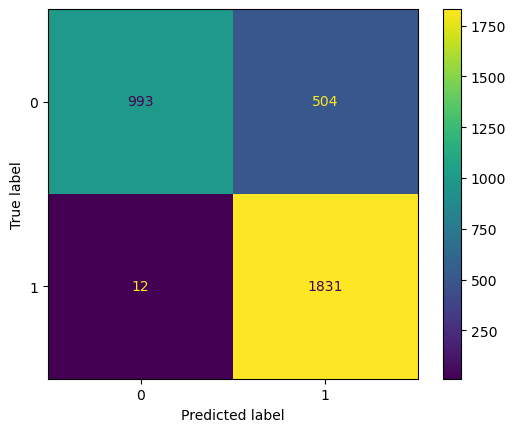

In [647]:
y_scores = mlp_keras.predict(X_test).ravel()

prec, rec, thresholds = precision_recall_curve(y_test, y_scores)

f1 = 2 * (prec * rec) / (prec + rec + 1e-9)
best_threshold = thresholds[np.argmax(f1)]

print("Melhor limiar:", best_threshold)

y_pred = (y_scores > best_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()